In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
!nvidia-smi

Sat Nov  8 20:52:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.80                 Driver Version: 581.80         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   41C    P8              2W /   70W |    3715MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers.legacy import Adam

In [5]:
random_file = "../data/blues.00000.wav"

c:\Users\ARNAV\anaconda3\envs\tf\lib\site-packages\librosa\core\intervals.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


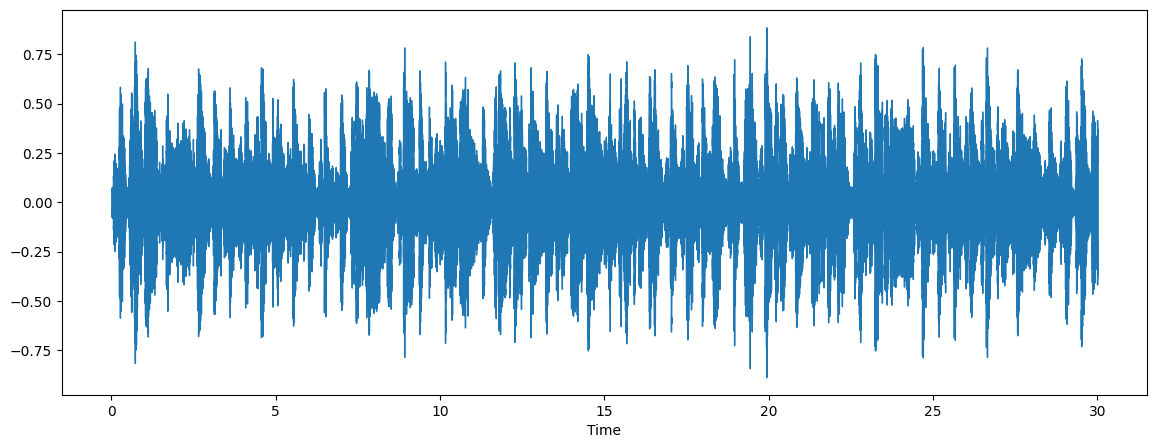

In [6]:
y, sr = librosa.load(random_file, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

In [7]:
y.shape

(1323588,)

In [8]:
from IPython.display import Audio
Audio(data=y, rate=sr)

In [9]:
y

array([ 0.00734921,  0.01335782,  0.01657649, ..., -0.07293832,
       -0.06308185, -0.03151622], dtype=float32)

22050
88200 44100


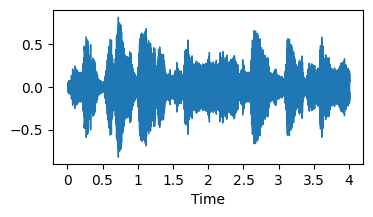

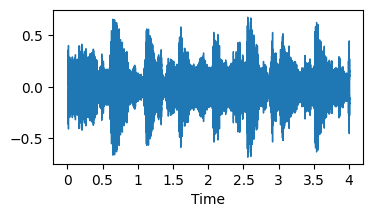

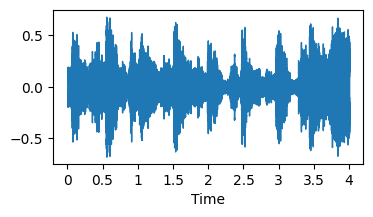

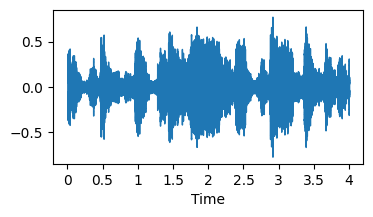

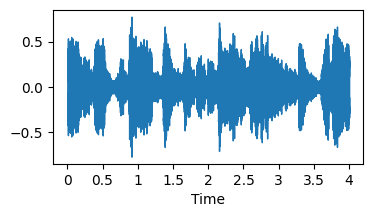

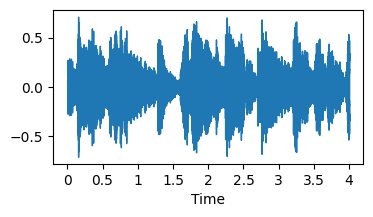

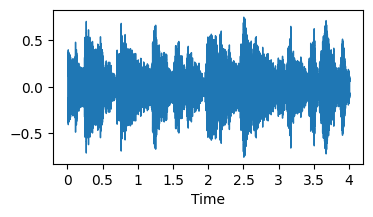

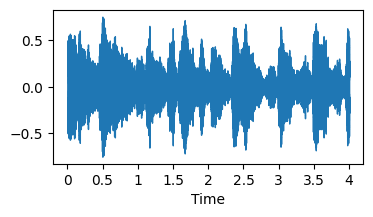

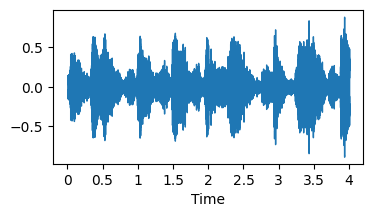

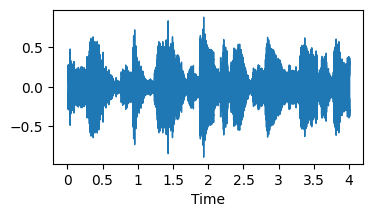

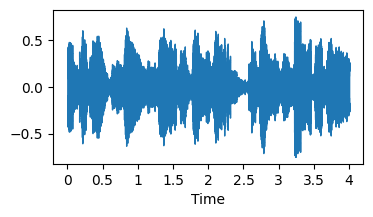

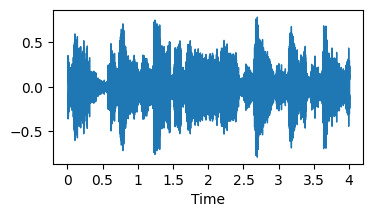

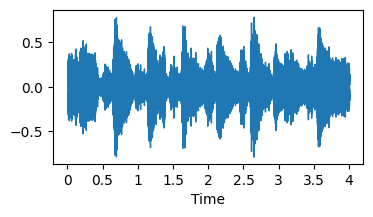

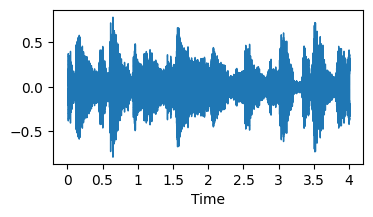

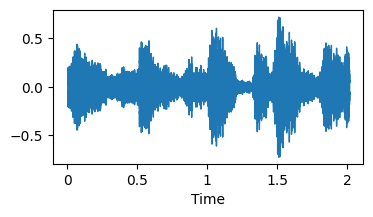

In [10]:
audio_path = "../data/blues.00000.wav"
y, sr = librosa.load(audio_path, sr=None)

chunk = 4
overlap = 2
print(sr)

chunk_samples = chunk * sr
overlap_samples = overlap * sr
print(chunk_samples, overlap_samples)

num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

for i in range(num_chunks):
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples

    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

In [11]:
def plot_melespectogram(y, sr):
    spectogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectogram_db = librosa.power_to_db(spectogram, ref=np.max)
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()

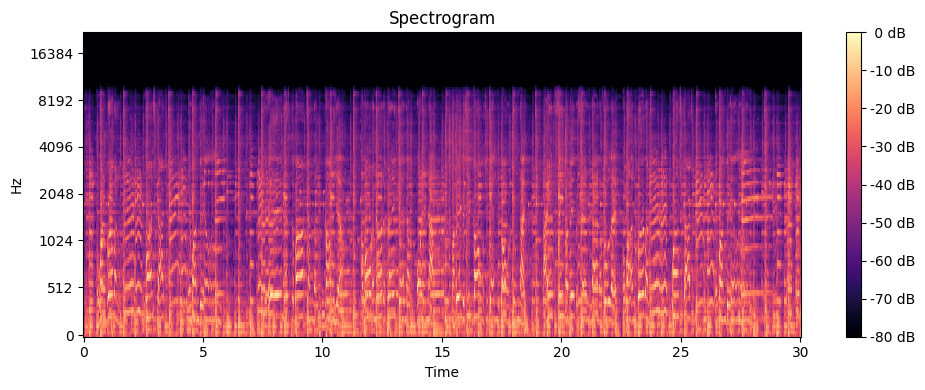

In [12]:
y,sr = librosa.load(audio_path,sr=44100)
plot_melespectogram(y,sr)

In [13]:
def plot_melspectrogram_chunks(y,sr):
    #define the duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2
    
    #Convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #Calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #iterate over each chunks
    for i in range(num_chunks):
        #Calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        #Extract the chunk audio
        chunk = y[start:end]
        #Melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #Visualize the spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

(128, 345)


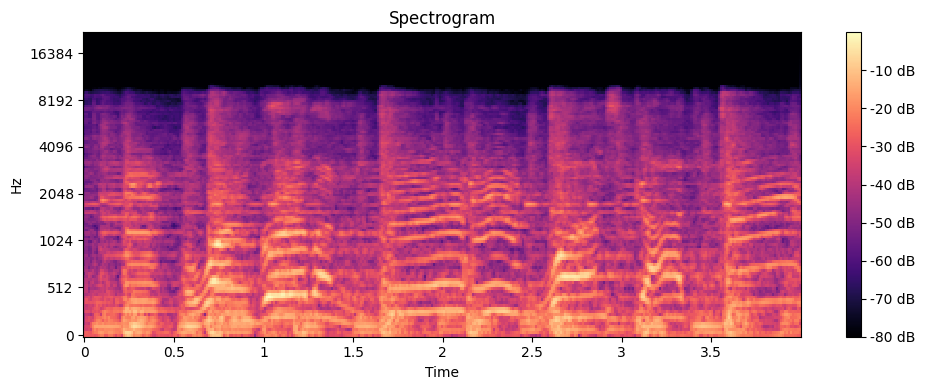

(128, 345)


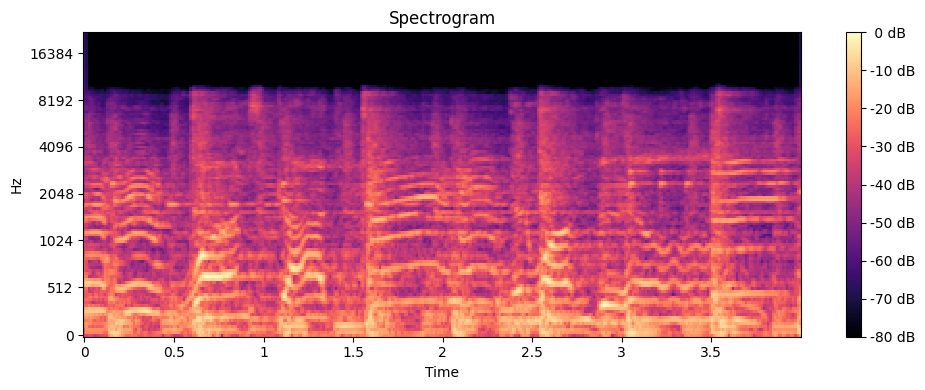

(128, 345)


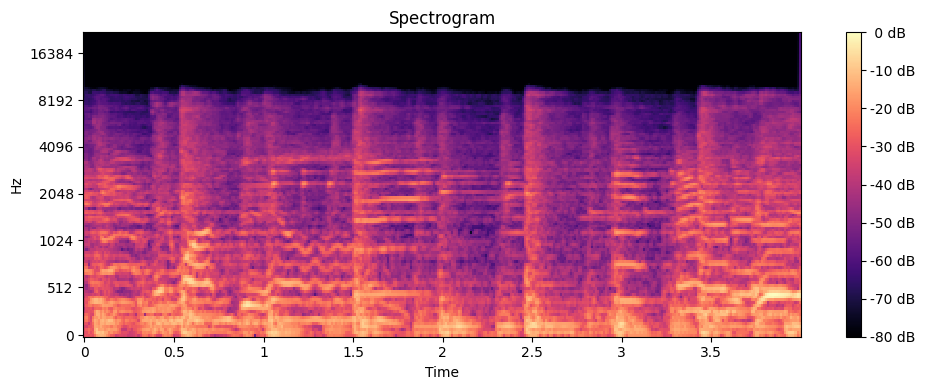

(128, 345)


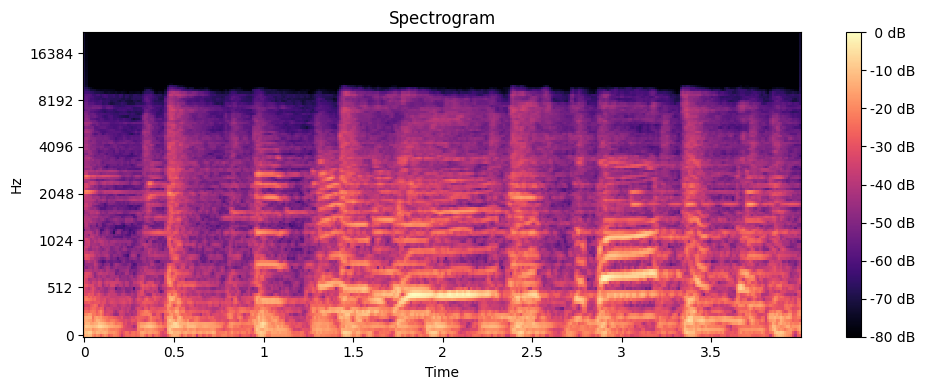

(128, 345)


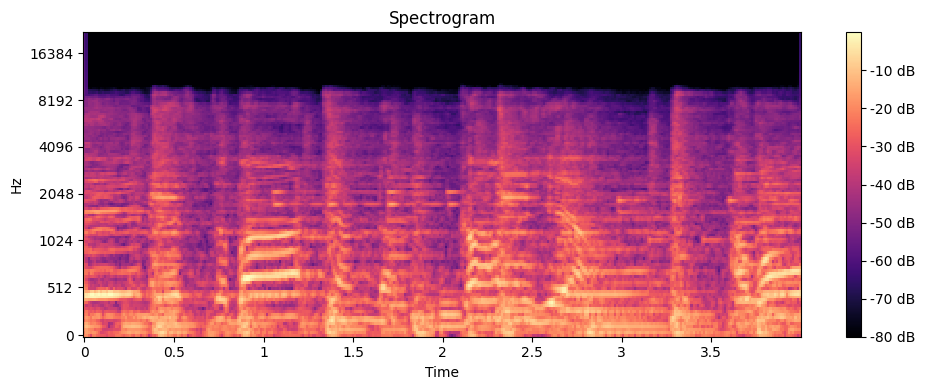

(128, 345)


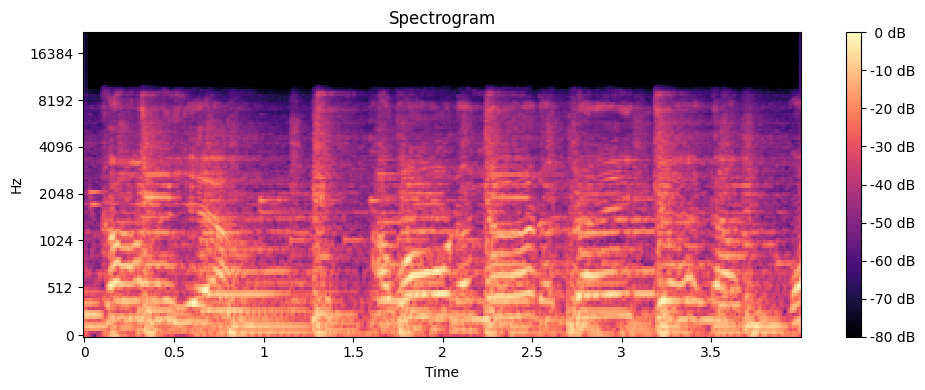

(128, 345)


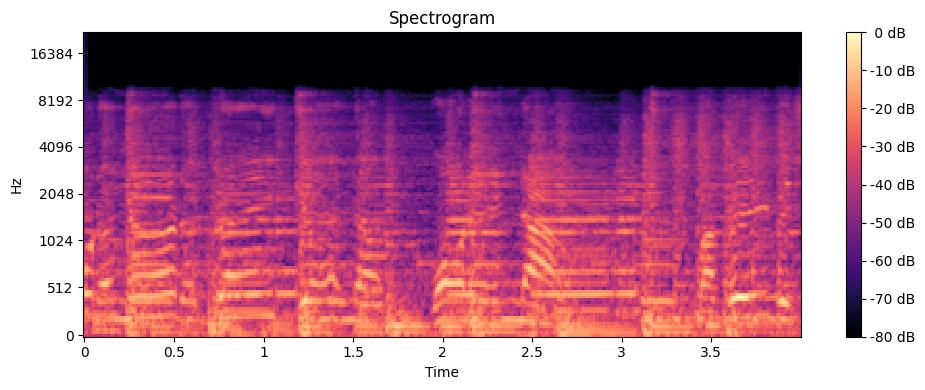

(128, 345)


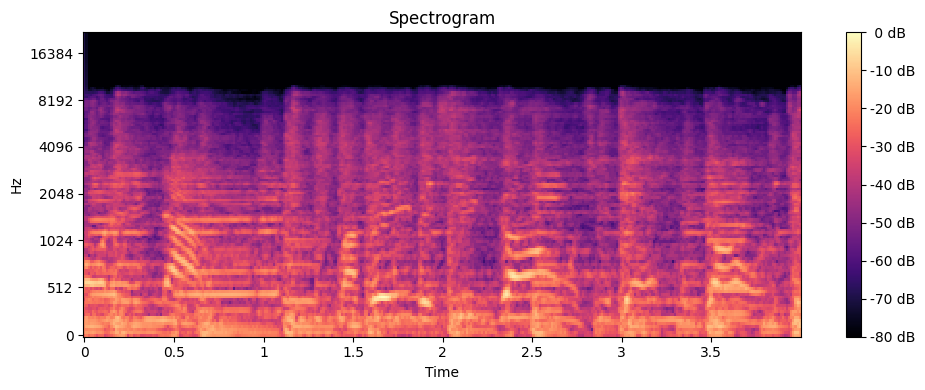

(128, 345)


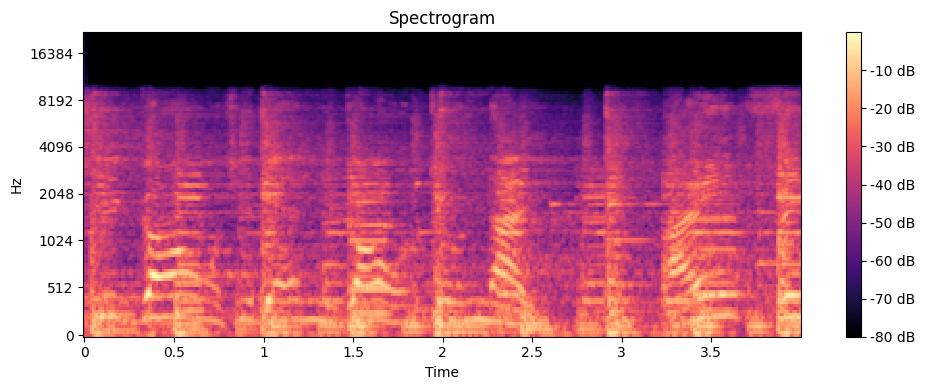

(128, 345)


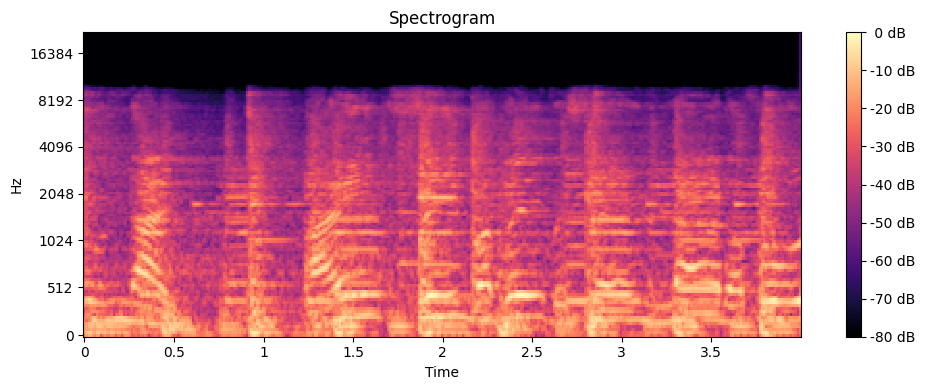

(128, 345)


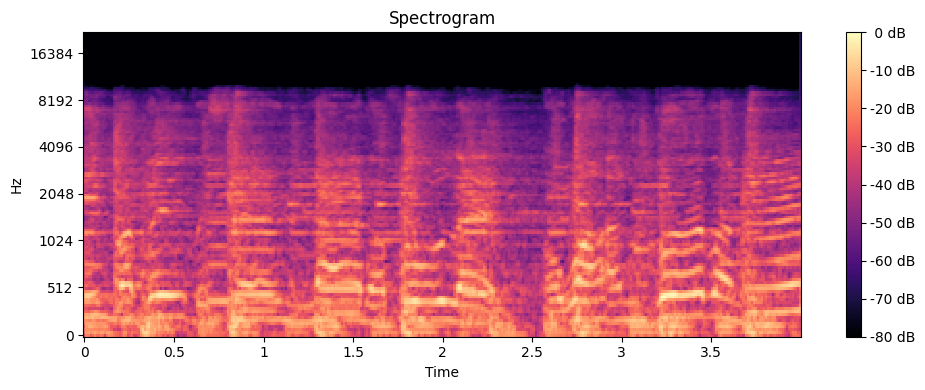

(128, 345)


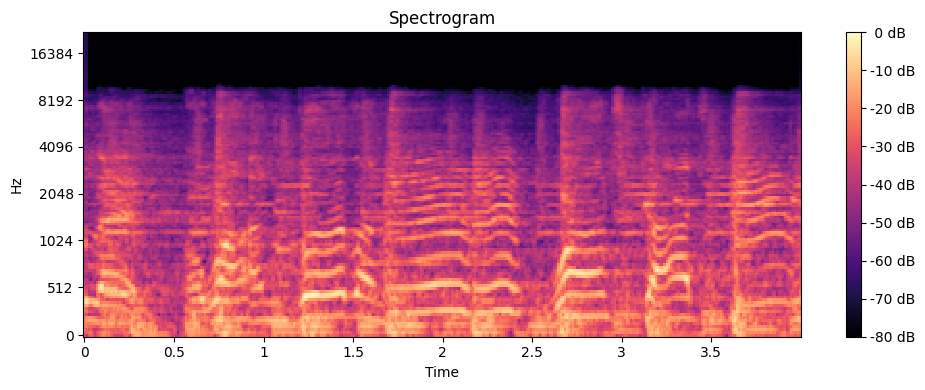

(128, 345)


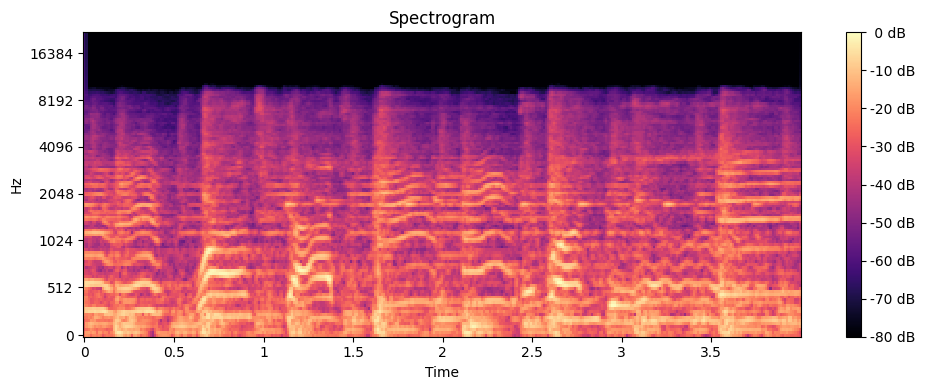

(128, 345)


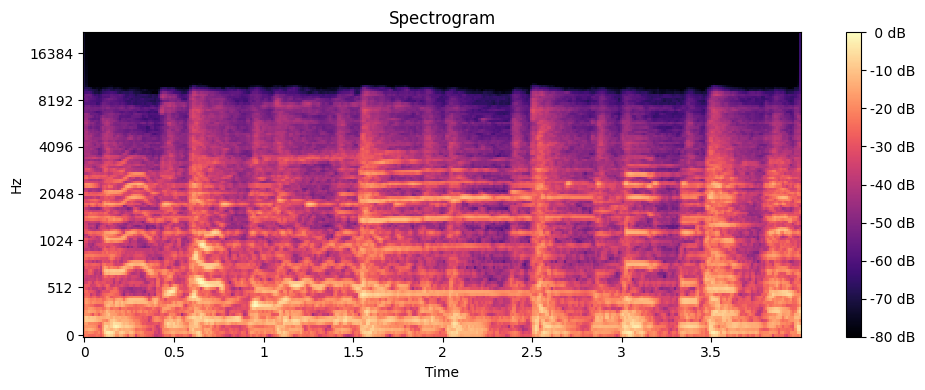

(128, 174)


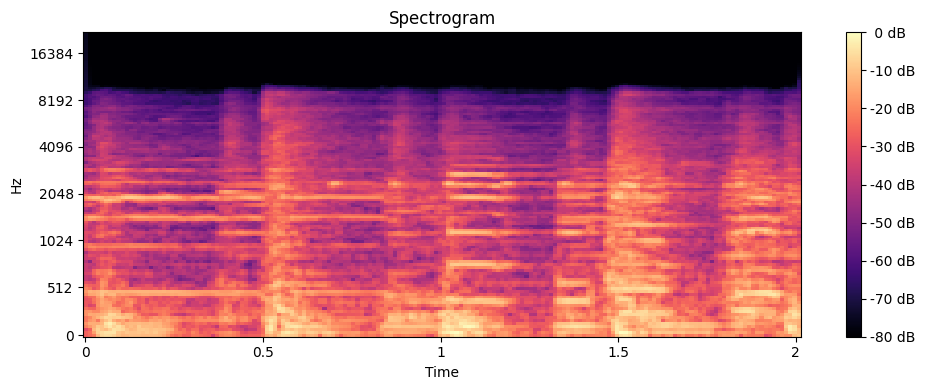

In [14]:
plot_melspectrogram_chunks(y,sr)

In [15]:
print(128*345)
print(210*210)

44160
44100


In [16]:
data_dir = "../data/genres_original"
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [17]:
from tensorflow.image import resize
#Load and preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                try:
                    audio_data,sample_rate = librosa.load(file_path,sr=None)
                except Exception as e:
                    print(f"Skipping {filename}: {e}")
                    continue 
                #Performing Preprocessing
                #define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2
                
                #Convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                #Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
                
                #iterate over each chunks
                for i in range(num_chunks):
                    #Calculate start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    #Extract the chunk audio
                    chunk = audio_data[start:end]
                    #Melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Resize matrix based on provided target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    #Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    #Return
    return np.array(data),np.array(labels)

In [18]:
data,labels = load_and_preprocess_data(data_dir,classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [19]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [20]:
print(data.shape)
print(labels.shape)

(14975, 150, 150, 1)
(14975,)


In [21]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, num_classes=len(classes))

In [22]:
labels.shape

(14975, 10)

In [23]:
print(labels[:5])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [25]:
model = tf.keras.models.Sequential()

In [26]:
X_train[0].shape

(150, 150, 1)

In [27]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [28]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [29]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Dropout(0.3))

In [31]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [33]:
model.add(Dropout(0.3))

In [34]:
model.add(Flatten())

In [35]:
model.add(Dense(units=1200, activation='relu'))

In [36]:
model.add(Dropout(0.45))

In [37]:
model.add(Dense(units=len(classes), activation='softmax'))

In [39]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [40]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/30
375/375 [==============================] - 47s 86ms/step - loss: 2.0192 - accuracy: 0.2460 - val_loss: 1.7213 - val_accuracy: 0.3703
Epoch 2/30
375/375 [==============================] - 30s 79ms/step - loss: 1.4683 - accuracy: 0.4761 - val_loss: 1.2307 - val_accuracy: 0.5643
Epoch 3/30
375/375 [==============================] - 30s 81ms/step - loss: 1.1663 - accuracy: 0.5949 - val_loss: 1.0522 - val_accuracy: 0.6334
Epoch 4/30
375/375 [==============================] - 31s 82ms/step - loss: 0.9853 - accuracy: 0.6609 - val_loss: 0.9076 - val_accuracy: 0.6998
Epoch 5/30
375/375 [==============================] - 31s 83ms/step - loss: 0.8329 - accuracy: 0.7129 - val_loss: 0.8306 - val_accuracy: 0.7195
Epoch 6/30
375/375 [==============================] - 32s 84ms/step - loss: 0.6954 - accuracy: 0.7632 - val_loss: 0.6522 - val_accuracy: 0.7886
Epoch 7/30
375/375 [==============================] - 32s 85ms/step - loss: 0.6005 - accuracy: 0.7997 - val_loss: 0.6123 - val_accuracy:

In [42]:
model.save("trained_model.h5")

In [43]:
training_history.history

{'loss': [2.019153118133545,
  1.4682762622833252,
  1.166329026222229,
  0.9852879047393799,
  0.8329164385795593,
  0.6953965425491333,
  0.6005423069000244,
  0.5078271627426147,
  0.4195554256439209,
  0.3635862469673157,
  0.3170955181121826,
  0.26691901683807373,
  0.24503067135810852,
  0.20161668956279755,
  0.18835772573947906,
  0.16407033801078796,
  0.1394672840833664,
  0.12558045983314514,
  0.11547110974788666,
  0.11094734072685242,
  0.08816907554864883,
  0.09689858555793762,
  0.07860027253627777,
  0.07800689339637756,
  0.09366939216852188,
  0.05904090777039528,
  0.07504204660654068,
  0.06254494935274124,
  0.06076312065124512,
  0.0616084448993206],
 'accuracy': [0.24599331617355347,
  0.47612687945365906,
  0.5949081778526306,
  0.6608514189720154,
  0.7128547430038452,
  0.7631886601448059,
  0.7996661067008972,
  0.8272120356559753,
  0.8545075058937073,
  0.8762103319168091,
  0.8960767984390259,
  0.9100167155265808,
  0.9167779684066772,
  0.932387292385

In [44]:
import json
with open("training_history.json", 'w') as f:
    json.dump(training_history.history, f)

In [45]:
f.close()

In [46]:
X_train

array([[[[3.23949524e+02],
         [1.30654617e+02],
         [6.70345402e+00],
         ...,
         [4.34789610e+00],
         [3.36882553e+01],
         [7.33191910e+01]],

        [[6.42828674e+02],
         [3.44813232e+02],
         [2.40324993e+01],
         ...,
         [5.41547928e+01],
         [1.88378082e+02],
         [2.72046265e+02]],

        [[4.72280457e+02],
         [2.40645081e+02],
         [2.22441921e+01],
         ...,
         [1.06598335e+02],
         [3.56269043e+02],
         [2.67052490e+02]],

        ...,

        [[2.59430637e-03],
         [5.44528186e-04],
         [3.36275771e-05],
         ...,
         [2.45642987e-05],
         [3.06418769e-05],
         [6.99046359e-05]],

        [[2.57155206e-03],
         [5.25189214e-04],
         [2.95105201e-06],
         ...,
         [2.10841904e-06],
         [6.14959026e-06],
         [5.34490537e-05]],

        [[2.54536537e-03],
         [5.17699809e-04],
         [7.90506149e-08],
         ...,
 

In [ ]:
model = tf.keras.models.load_model("./trained_model.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [49]:
import json
with open("training_history.json",'r') as json_file:
    training_history_data = json.load(json_file)
f.close()

In [50]:
training_history_data.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

375/375 [==============================] - 10s 26ms/step - loss: 0.0614 - accuracy: 0.9787


In [52]:
train_loss,train_accuracy

(0.06135063245892525, 0.9787145256996155)

In [53]:
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

94/94 [==============================] - 3s 26ms/step - loss: 0.4888 - accuracy: 0.8698


In [54]:
val_loss,val_accuracy

(0.4887632429599762, 0.8697829842567444)

In [55]:
training_history_data['val_loss']

[1.7212611436843872,
 1.2307024002075195,
 1.0521663427352905,
 0.9075736403465271,
 0.8305994272232056,
 0.652248740196228,
 0.6123086214065552,
 0.5787715315818787,
 0.4769705832004547,
 0.46502721309661865,
 0.44370126724243164,
 0.4933874309062958,
 0.39174988865852356,
 0.3847631812095642,
 0.3792998790740967,
 0.42163893580436707,
 0.40819403529167175,
 0.3727701008319855,
 0.43738362193107605,
 0.38152146339416504,
 0.3550683557987213,
 0.4201091229915619,
 0.39705440402030945,
 0.36560487747192383,
 0.3566407561302185,
 0.434770792722702,
 0.33939141035079956,
 0.46910709142684937,
 0.3617565333843231,
 0.4887632429599762]

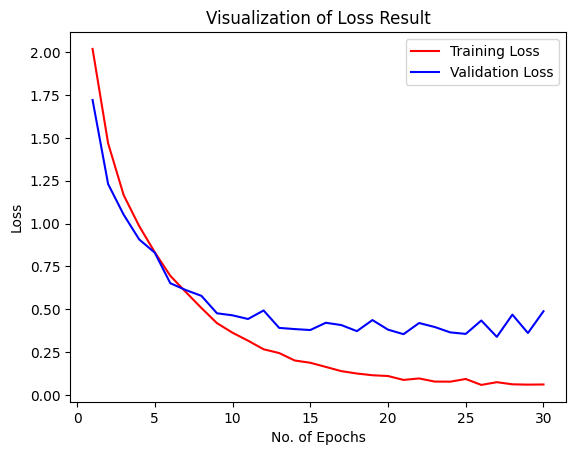

In [56]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

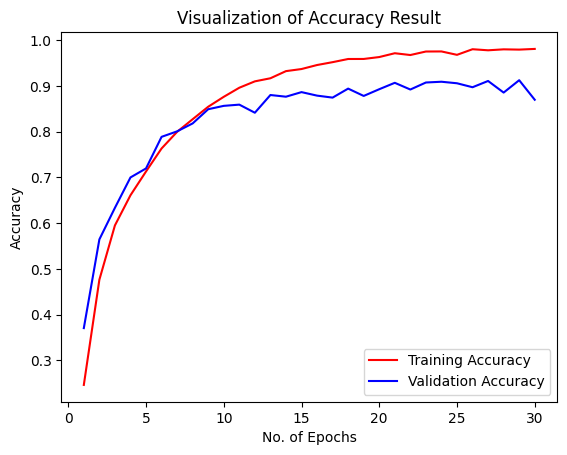

In [57]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [58]:
X_test.shape

(2995, 150, 150, 1)

In [59]:
y_pred = model.predict(X_test)
y_pred[:5]

94/94 [==============================] - 2s 23ms/step


array([[7.86508372e-06, 2.81019027e-07, 3.58668643e-07, 1.64067344e-04,
        3.63333587e-04, 3.81434319e-07, 7.14984126e-05, 9.99356687e-01,
        8.57963278e-06, 2.69403936e-05],
       [2.57227283e-15, 1.29400040e-18, 1.00397081e-16, 9.24746036e-17,
        4.18327656e-12, 2.24839136e-15, 1.00000000e+00, 1.30617578e-18,
        6.16338032e-17, 9.48979206e-09],
       [7.46963418e-13, 6.10537579e-15, 3.91602237e-14, 1.27856879e-14,
        2.47955025e-11, 4.33965716e-13, 9.99999881e-01, 4.72173299e-14,
        2.36484043e-14, 8.63011493e-08],
       [4.48723253e-10, 2.66516045e-11, 1.56265323e-09, 9.99894619e-01,
        8.61872351e-09, 1.54357657e-12, 5.15671372e-09, 6.04849371e-09,
        3.14294567e-07, 1.05026054e-04],
       [1.70012703e-33, 0.00000000e+00, 0.00000000e+00, 5.93147220e-32,
        1.00000000e+00, 5.37896196e-37, 1.13909954e-29, 1.70114207e-22,
        4.82452958e-34, 5.29782491e-32]], dtype=float32)

In [60]:
y_pred.shape

(2995, 10)

In [61]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [62]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [63]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [64]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.89      0.88      0.88       302
   classical       0.93      0.96      0.95       298
     country       0.87      0.75      0.81       317
       disco       0.89      0.89      0.89       312
      hiphop       0.78      0.97      0.87       277
        jazz       0.96      0.85      0.90       311
       metal       0.83      0.99      0.90       302
         pop       0.86      0.92      0.89       289
      reggae       0.96      0.73      0.83       296
        rock       0.75      0.76      0.76       291

    accuracy                           0.87      2995
   macro avg       0.87      0.87      0.87      2995
weighted avg       0.88      0.87      0.87      2995



In [65]:
cm

array([[265,   0,   9,   2,   8,   1,   3,   3,   0,  11],
       [  3, 287,   1,   0,   0,   5,   0,   0,   0,   2],
       [  7,   1, 239,   6,   1,   2,  12,   8,   2,  39],
       [  1,   1,   0, 278,   8,   0,   2,  14,   2,   6],
       [  1,   0,   0,   0, 269,   2,   3,   2,   0,   0],
       [  9,  13,  13,   0,   2, 265,   4,   1,   0,   4],
       [  0,   0,   1,   0,   1,   0, 298,   0,   0,   2],
       [  5,   3,   3,   2,   3,   0,   0, 267,   3,   3],
       [  3,   1,   7,  16,  39,   0,   1,   8, 216,   5],
       [  3,   1,   3,   8,  12,   0,  34,   8,   1, 221]], dtype=int64)

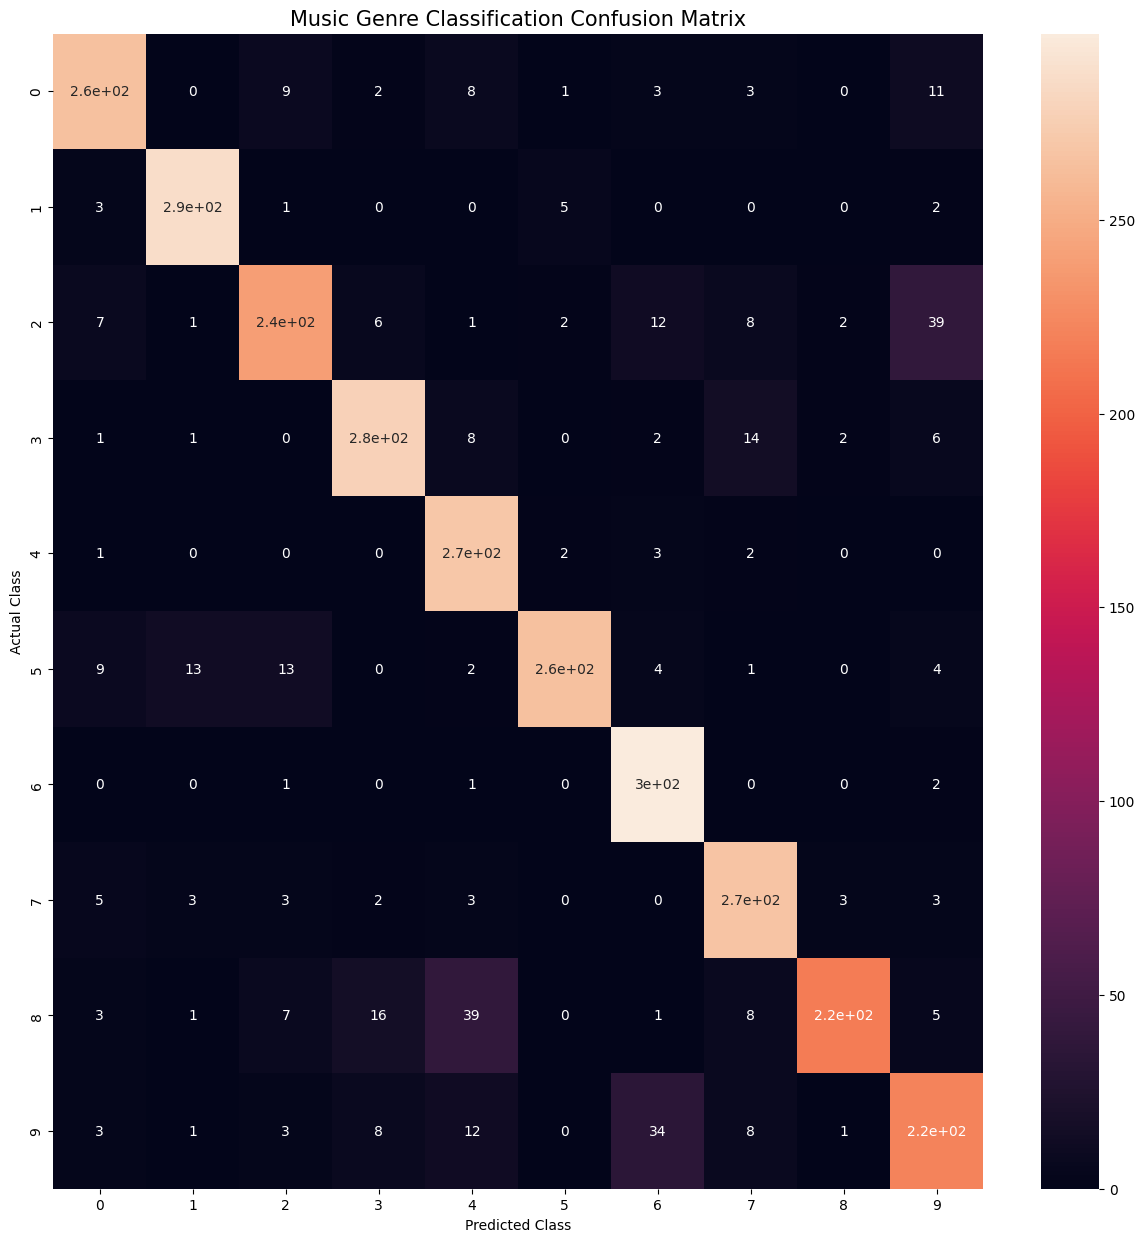

In [66]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()